<h1> Data Analysis of 500 Amazon Reviews of MI TWS <h1>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


In [4]:
#from wordcloud import wordCloud

In [5]:
df=pd.read_csv('MI_TWS.csv')

In [6]:
df.head(10)

,ASIN,ID,TOPIC,RATEABLE,SENTIMENT SCORE,SNIPPET,SUBTOPICS,QUESTION,ANSWER,QA SCORE,NOUNS,ADJECTIVES,VERBS
0,B087DH51VB,RDTERSPC9BBWB,big,False,0.002793,please help for the same since i have paid ver...,"{""big"": 0.0027930468000799125}",NaN,NaN,NaN,[],[],[]
1,B087DH51VB,R36MXHTL1T0KGH,working,False,-0.863344,sensors stoped working withinn 8 months,"{""working"": -0.8633438074092841}",what's bad about working?,sensors,0.224295,['sensors'],[],[]
2,B087DH51VB,RDTERSPC9BBWB,same,False,0.011544,please help for the same since i have paid ver...,"{""same"": 0.011544492095841796}",NaN,NaN,NaN,[],[],[]
3,B087DH51VB,RZOT7CYEWJ1RH,fit,True,-0.990866,"not my type, did not fit my ears therefore ret...","{""fit"": -0.9908660001020115}",what's bad about fit?,did not fit my ears,0.075731,['ears'],[],['fit']
4,B087DH51VB,R36MXHTL1T0KGH,mi,True,-0.982582,worst ever product from mi,"{""mi"": -0.9825818004178568}",what's bad about mi?,worst ever product,0.684608,['product'],['worst'],[]
5,B087DH51VB,RJ2FSALDSGVTK,ear,True,0.860775,ear set do not charge,"{""ear"": 0.8607750350313677}",what's good about ear?,do not charge,0.550605,[],[],['charge']
6,B087DH51VB,R36MXHTL1T0KGH,noise cancellation,True,-0.989695,noise cancellation quality declined in 8 months,"{""noise cancellation"": -0.9896953251805995}",what's bad about noise cancellation?,quality declined,0.270862,['quality'],[],['declined']
7,B087DH51VB,R3JDZG625SXKYQ,review,True,-0.033414,i was almost taken aback by the thick stem and...,"{""review"": -0.03341356108671012}",NaN,NaN,NaN,[],[],[]
8,B087DH51VB,R2UM14B17ORKUT,working,False,0.000000,left bud not working anymore... after rare usa...,"{""working"": 0.0}",NaN,NaN,NaN,[],[],[]
9,B087DH51VB,RCIFYDHD55UH0,ear,True,-0.993795,i am getting pain in my ears after/while using it,"{""ear"": -0.9937945527018637}",what's bad about ear?,pain in my ears,0.280755,"['pain', 'ears']",[],[]


In [7]:
df['TOPIC'].nunique()

469

In [8]:
df.to_csv('MI_TWS.csv',index=False)

In [9]:
new_true=df.loc[df['RATEABLE'] == True, 'TOPIC']
new_true.count()


3681

In [10]:
new_true=new_true.to_frame()
new_true.head()

,TOPIC
3,fit
4,mi
5,ear
6,noise cancellation
7,review


In [11]:
new_true['INDEX']=new_true.index
new1=new_true.reset_index()
new1.drop('index', inplace=True, axis=1)
new1

,TOPIC,INDEX
0,fit,3
1,mi,4
2,ear,5
3,noise cancellation,6
4,review,7
...,...,...
3676,sound quality,5281
3677,sound quality,5282
3678,sound quality,5283
3679,sound quality,5284


In [12]:
new_false=df.loc[df['RATEABLE'] == False, 'TOPIC']
new_false.count()

1605

In [13]:
new_false=new_false.to_frame()

In [14]:
new_false['INDEX']=new_false.index
new2=new_false.reset_index()
new2.drop('index', inplace=True, axis=1)
new2

,TOPIC,INDEX
0,big,0
1,working,1
2,same,2
3,working,8
4,purchase,10
...,...,...
1600,quality,4758
1601,quality,4766
1602,quality,4773
1603,quality,4778


In [15]:
Relevent=new_true['TOPIC'].unique()
Relevent

array(['fit', 'mi', 'ear', 'noise cancellation', 'review', 'quality',
       'sound', 'case', 'ear bud', 'call', 'connectivity', 'ear phone',
       'price', 'battery', 'other brands', 'charge', 'device', 'feature',
       'tws', 'sound quality', 'side', 'music', 'phone', 'heavy',
       'person', 'vocal', 'bass', 'experience', 'connect', 'volume',
       'option', 'design', 'mic'], dtype=object)

In [16]:
Irrelevent=new_false['TOPIC'].unique()
Irrelevent


array(['big', 'working', 'same', 'purchase', 'set', 'expectation',
       'sensor', 'connectivity', 'tech', 'oppo', 'baked', 'reset', 'fan',
       'caller', 'side wireless', 'usage', 'please', '2 month',
       'wireless', 'look', 'battery issue', 'one side',
       'product quantity', 'detection', 'ear bud', 'ten year', 'gesture',
       'time', 'head phone', 'mobile', 'attached', 'xiaomi', 'order',
       'battery problem', 'packaging', 'recommendation', 'call', 'mic',
       'port', 'que', 'megnatic', 'gaming', 'neo', 'item', 'month',
       'touch response', 'quality', 'returns', 'respond', 'service',
       'customer care', 'seller', 'listening', 'earshot', 'latency mood',
       'output', 'loudness', 'company', 'stopp', 'silicon grab',
       'volume output', 'gaming experience', 'transistor', 'backup',
       'air pod', 'persisting', 'deduced', 'bluetooth', 'f1', 'persona',
       'bass people', 'marketplace', 'neodymium magnet driver', 'pairing',
       'price segment', 'view'

In [17]:
new1.count()

TOPIC    3681
INDEX    3681
dtype: int64

In [18]:
true_SE=df.loc[df['RATEABLE'] == True, 'SENTIMENT SCORE']
SS=true_SE.to_frame()
SS

,SENTIMENT SCORE
3,-0.990866
4,-0.982582
5,0.860775
6,-0.989695
7,-0.033414
...,...
5281,-1.000000
5282,0.023861
5283,0.975962
5284,0.984852


In [19]:
SS.index.name='INDEX'
SS

,SENTIMENT SCORE
INDEX,
3,-0.990866
4,-0.982582
5,0.860775
6,-0.989695
7,-0.033414
...,...
5281,-1.000000
5282,0.023861
5283,0.975962


In [20]:
new_df = pd.merge(new1,SS, on='INDEX', how='left')
new_df


,TOPIC,INDEX,SENTIMENT SCORE
0,fit,3,-0.990866
1,mi,4,-0.982582
2,ear,5,0.860775
3,noise cancellation,6,-0.989695
4,review,7,-0.033414
...,...,...,...
3676,sound quality,5281,-1.000000
3677,sound quality,5282,0.023861
3678,sound quality,5283,0.975962
3679,sound quality,5284,0.984852


In [21]:
new_df

,TOPIC,INDEX,SENTIMENT SCORE
0,fit,3,-0.990866
1,mi,4,-0.982582
2,ear,5,0.860775
3,noise cancellation,6,-0.989695
4,review,7,-0.033414
...,...,...,...
3676,sound quality,5281,-1.000000
3677,sound quality,5282,0.023861
3678,sound quality,5283,0.975962
3679,sound quality,5284,0.984852


In [22]:
new_df['SENTIMENT SCORE'].mean()
#here we see that the mean is positive which broadly mean that the overall review of product is not negative ,
#but this is not enough to get an idea of how and on what parameteres users liked or disliked the product.

0.1831479689087208

In [23]:
new_true3=df.loc[df['RATEABLE'] == True, 'QA SCORE']
fine=new_true3.to_frame()
fine

,QA SCORE
3,0.075731
4,0.684608
5,0.550605
6,0.270862
7,NaN
...,...
5281,0.271318
5282,NaN
5283,0.426415
5284,0.135608


In [24]:
fine['INDEX']=fine.index
fine


,QA SCORE,INDEX
3,0.075731,3
4,0.684608,4
5,0.550605,5
6,0.270862,6
7,NaN,7
...,...,...
5281,0.271318,5281
5282,NaN,5282
5283,0.426415,5283
5284,0.135608,5284


In [25]:

fine=fine.reset_index()
fine


,index,QA SCORE,INDEX
0,3,0.075731,3
1,4,0.684608,4
2,5,0.550605,5
3,6,0.270862,6
4,7,NaN,7
...,...,...,...
3676,5281,0.271318,5281
3677,5282,NaN,5282
3678,5283,0.426415,5283
3679,5284,0.135608,5284


In [26]:
fine.drop('index',inplace=True,axis=1)

In [27]:
fine

,QA SCORE,INDEX
0,0.075731,3
1,0.684608,4
2,0.550605,5
3,0.270862,6
4,NaN,7
...,...,...
3676,0.271318,5281
3677,NaN,5282
3678,0.426415,5283
3679,0.135608,5284


In [28]:
new_df = pd.merge(new_df,fine, on='INDEX', how='left')


In [29]:
new_df

,TOPIC,INDEX,SENTIMENT SCORE,QA SCORE
0,fit,3,-0.990866,0.075731
1,mi,4,-0.982582,0.684608
2,ear,5,0.860775,0.550605
3,noise cancellation,6,-0.989695,0.270862
4,review,7,-0.033414,NaN
...,...,...,...,...
3676,sound quality,5281,-1.000000,0.271318
3677,sound quality,5282,0.023861,NaN
3678,sound quality,5283,0.975962,0.426415
3679,sound quality,5284,0.984852,0.135608


In [30]:
new_df['QA SCORE'].fillna(0, inplace=True)
new_df


,TOPIC,INDEX,SENTIMENT SCORE,QA SCORE
0,fit,3,-0.990866,0.075731
1,mi,4,-0.982582,0.684608
2,ear,5,0.860775,0.550605
3,noise cancellation,6,-0.989695,0.270862
4,review,7,-0.033414,0.000000
...,...,...,...,...
3676,sound quality,5281,-1.000000,0.271318
3677,sound quality,5282,0.023861,0.000000
3678,sound quality,5283,0.975962,0.426415
3679,sound quality,5284,0.984852,0.135608


In [31]:
by_topic=new_df.groupby('TOPIC').mean()
by_topic.drop('INDEX',inplace=True,axis=1)
by_topic = by_topic.reset_index()


In [32]:
by_topic

,TOPIC,SENTIMENT SCORE,QA SCORE
0,bass,0.016711,0.255537
1,battery,0.062413,0.261066
2,call,0.200622,0.269333
3,case,0.142150,0.078409
4,charge,-0.041738,0.177456
5,connect,-0.024887,0.146067
6,connectivity,0.210883,0.174404
7,design,0.331626,0.170024
8,device,0.378107,0.247141
9,ear,-0.052733,0.144599


In [33]:
def fun(x):
    if (x == "bass" or x == "sound" or x=="music" or x=='sound quality' or x=='noise cancellation'or x=='bass' or x=='volume'):
        return "Sound"
    elif (x == "battery" or x=="charge" or x=="tws"):
        return "Charging"
    elif (x=='case' or x=='design' or x=='device'or x=='fit'or x=='heavy'or x=='side'):
        return "Build"
    elif (x=='connectivity' or x=='connect' or x=='call'or x=='phone'or x=='mic'or x=='vocal'):
        return "Connectivity"
    elif (x=="ear" or x=='ear bud' or x=='experience' or x=='review'or x=='quality'or x=='feature' or x=='ear phone'):
        return "Comfort"
    elif(x=='price'):
        return "price"
    else : return "others"
    
        

In [34]:
by_topic = by_topic[by_topic.TOPIC.isin(['bass', 'battery', 'call', 'case', 'charge', 'connect',
       'connectivity', 'design', 'device', 'ear', 'ear bud', 'ear phone',
       'experience', 'feature', 'fit', 'heavy', 'mi', 'mic', 'music',
       'noise cancellation', 'option', 'other brands', 'person', 'phone',
       'price', 'quality', 'review', 'side', 'sound', 'sound quality',
       'tws', 'vocal', 'volume'])]

In [35]:
by_topic["CATEGORY"] = by_topic.TOPIC.apply(lambda x: fun(x))


In [36]:
by_topic
by_topic.rename({'SENTIMENT SCORE':'SENTIMENT_SCORE'}, axis='columns', inplace=True)

In [37]:
by_topic

,TOPIC,SENTIMENT_SCORE,QA SCORE,CATEGORY
0,bass,0.016711,0.255537,Sound
1,battery,0.062413,0.261066,Charging
2,call,0.200622,0.269333,Connectivity
3,case,0.142150,0.078409,Build
4,charge,-0.041738,0.177456,Charging
5,connect,-0.024887,0.146067,Connectivity
6,connectivity,0.210883,0.174404,Connectivity
7,design,0.331626,0.170024,Build
8,device,0.378107,0.247141,Build
9,ear,-0.052733,0.144599,Comfort


In [38]:
by_topic.describe()

,SENTIMENT_SCORE,QA SCORE
count,33.000000,33.000000
mean,0.118901,0.190367
std,0.195957,0.099144
min,-0.384963,0.023243
25%,0.000388,0.146067
50%,0.086887,0.177456
75%,0.210883,0.255537
max,0.567593,0.534131


In [39]:
def ratingfun(x):
    if (x >= 0.210883):
        return "*****"
    elif (x>=0.086887):
        return "****"
    elif (x>=0.0388):
        return "***"
    elif (x>=0.00626755):
        return "**"
    else : return "*"

In [40]:
by_topic['RATING'] = by_topic.SENTIMENT_SCORE.apply(lambda x: ratingfun(x))


In [41]:
by_topic


,TOPIC,SENTIMENT_SCORE,QA SCORE,CATEGORY,RATING
0,bass,0.016711,0.255537,Sound,**
1,battery,0.062413,0.261066,Charging,***
2,call,0.200622,0.269333,Connectivity,****
3,case,0.142150,0.078409,Build,****
4,charge,-0.041738,0.177456,Charging,*
5,connect,-0.024887,0.146067,Connectivity,*
6,connectivity,0.210883,0.174404,Connectivity,*****
7,design,0.331626,0.170024,Build,*****
8,device,0.378107,0.247141,Build,*****
9,ear,-0.052733,0.144599,Comfort,*


In [42]:
by_topic.index = np.arange(1,len(by_topic)+1)

In [43]:
by_topic

,TOPIC,SENTIMENT_SCORE,QA SCORE,CATEGORY,RATING
1,bass,0.016711,0.255537,Sound,**
2,battery,0.062413,0.261066,Charging,***
3,call,0.200622,0.269333,Connectivity,****
4,case,0.142150,0.078409,Build,****
5,charge,-0.041738,0.177456,Charging,*
6,connect,-0.024887,0.146067,Connectivity,*
7,connectivity,0.210883,0.174404,Connectivity,*****
8,design,0.331626,0.170024,Build,*****
9,device,0.378107,0.247141,Build,*****
10,ear,-0.052733,0.144599,Comfort,*


In [44]:
by_cat=by_topic

In [45]:
by_cat.drop('TOPIC',inplace=True,axis=1)

In [46]:
by_cat.drop('RATING',inplace=True,axis=1)

In [47]:
by_cat=by_cat.groupby('CATEGORY').mean()


In [48]:
by_cat

,SENTIMENT_SCORE,QA SCORE
CATEGORY,,
Build,0.089522,0.153130
Charging,0.140281,0.219502
Comfort,0.020524,0.174117
Connectivity,0.116676,0.227544
Sound,0.192621,0.247430
others,0.240962,0.089234
price,0.002451,0.279234


In [49]:
by_cat['RATING'] = by_cat.SENTIMENT_SCORE.apply(lambda x: ratingfun(x))


<h2> Rating System for users 

In [76]:
#1
by_cat
by_cat=by_cat.reset_index()

In [78]:
by_cat
by_cat.drop('index',inplace=True,axis=1)

In [79]:
by_cat

,CATEGORY,SENTIMENT_SCORE,QA SCORE,RATING
0,Build,0.089522,0.153130,4
1,Charging,0.140281,0.219502,4
2,Comfort,0.020524,0.174117,2
3,Connectivity,0.116676,0.227544,4
4,Sound,0.192621,0.247430,4
5,others,0.240962,0.089234,5
6,price,0.002451,0.279234,1


In [52]:
by_cat.index = np.arange(1,len(by_cat)+1)

In [53]:
by_cat

,CATEGORY,SENTIMENT_SCORE,QA SCORE,RATING
1,Build,0.089522,0.153130,****
2,Charging,0.140281,0.219502,****
3,Comfort,0.020524,0.174117,**
4,Connectivity,0.116676,0.227544,****
5,Sound,0.192621,0.247430,****
6,others,0.240962,0.089234,*****
7,price,0.002451,0.279234,*


In [54]:
RATING = ['4', '4', '2', '4','4','5','1']

In [55]:
by_cat['RATING']=RATING

In [56]:
by_cat

,CATEGORY,SENTIMENT_SCORE,QA SCORE,RATING
1,Build,0.089522,0.153130,4
2,Charging,0.140281,0.219502,4
3,Comfort,0.020524,0.174117,2
4,Connectivity,0.116676,0.227544,4
5,Sound,0.192621,0.247430,4
6,others,0.240962,0.089234,5
7,price,0.002451,0.279234,1


<h2> Word Cloud 

In [ ]:
#2
#could be made using wordcloud library of python

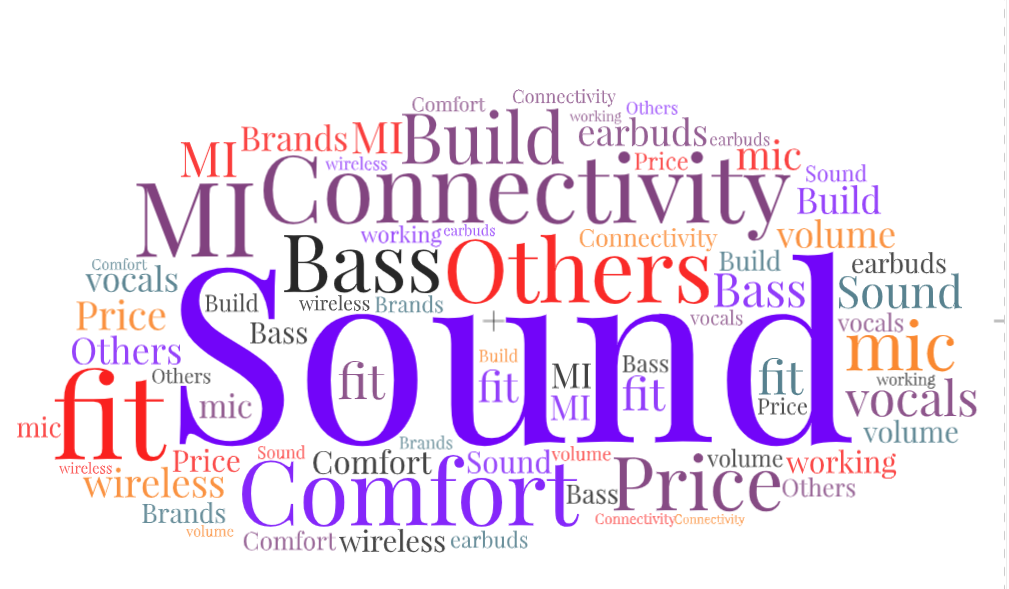

In [98]:
df.head(50)

,ASIN,ID,TOPIC,RATEABLE,SENTIMENT SCORE,SNIPPET,SUBTOPICS,QUESTION,ANSWER,QA SCORE,NOUNS,ADJECTIVES,VERBS
0,B087DH51VB,RDTERSPC9BBWB,big,False,0.002793,please help for the same since i have paid ver...,"{""big"": 0.0027930468000799125}",NaN,NaN,NaN,[],[],[]
1,B087DH51VB,R36MXHTL1T0KGH,working,False,-0.863344,sensors stoped working withinn 8 months,"{""working"": -0.8633438074092841}",what's bad about working?,sensors,0.224295,['sensors'],[],[]
2,B087DH51VB,RDTERSPC9BBWB,same,False,0.011544,please help for the same since i have paid ver...,"{""same"": 0.011544492095841796}",NaN,NaN,NaN,[],[],[]
3,B087DH51VB,RZOT7CYEWJ1RH,fit,True,-0.990866,"not my type, did not fit my ears therefore ret...","{""fit"": -0.9908660001020115}",what's bad about fit?,did not fit my ears,0.075731,['ears'],[],['fit']
4,B087DH51VB,R36MXHTL1T0KGH,mi,True,-0.982582,worst ever product from mi,"{""mi"": -0.9825818004178568}",what's bad about mi?,worst ever product,0.684608,['product'],['worst'],[]
5,B087DH51VB,RJ2FSALDSGVTK,ear,True,0.860775,ear set do not charge,"{""ear"": 0.8607750350313677}",what's good about ear?,do not charge,0.550605,[],[],['charge']
6,B087DH51VB,R36MXHTL1T0KGH,noise cancellation,True,-0.989695,noise cancellation quality declined in 8 months,"{""noise cancellation"": -0.9896953251805995}",what's bad about noise cancellation?,quality declined,0.270862,['quality'],[],['declined']
7,B087DH51VB,R3JDZG625SXKYQ,review,True,-0.033414,i was almost taken aback by the thick stem and...,"{""review"": -0.03341356108671012}",NaN,NaN,NaN,[],[],[]
8,B087DH51VB,R2UM14B17ORKUT,working,False,0.000000,left bud not working anymore... after rare usa...,"{""working"": 0.0}",NaN,NaN,NaN,[],[],[]
9,B087DH51VB,RCIFYDHD55UH0,ear,True,-0.993795,i am getting pain in my ears after/while using it,"{""ear"": -0.9937945527018637}",what's bad about ear?,pain in my ears,0.280755,"['pain', 'ears']",[],[]


In [58]:
QA_low=df.sort_values("QA SCORE",ascending=True)

In [59]:
QA_high=df.sort_values("QA SCORE",ascending=False)

In [60]:
#df['QA SCORE'] = df['QA SCORE'].fillna(0)

In [61]:
# QA_aesc=df.loc[df.sort_values("QA SCORE",ascending=False)['RATEABLE']==True]
  

In [62]:
QA_high_true=QA_high.loc[(QA_high['RATEABLE']==True) & (QA_high['QA SCORE']!=0)]

In [97]:
QA_high_true.head(50)

,ASIN,ID,TOPIC,RATEABLE,SENTIMENT SCORE,SNIPPET,SUBTOPICS,QUESTION,ANSWER,QA SCORE,NOUNS,ADJECTIVES,VERBS
478,B087DH51VB,RLYS0CMT5JQZ2,battery,True,0.998240,battery life is good,"{""battery life"": 0.9982402410006179}",what's good about battery life?,battery life,0.975579,"['battery', 'life']",[],[]
3386,B087DH51VB,RTAHF7DUYEIOY,ear bud,True,0.436762,......mi ear buds 2... sound quality is good r...,"{""ear bud"": -0.038355533957679544, ""bud"": 0.91...",what's good about ear bud?,sound quality,0.974858,['quality'],['sound'],[]
5237,B087DH51VB,R3EEV9Y0SUIX0A,sound quality,True,0.998260,...............superb sound quality,"{""sound quality"": 0.9982596124606216}",what's good about sound quality?,superb,0.974618,['superb'],[],[]
3431,B087DH51VB,RTAHF7DUYEIOY,ear bud,True,0.436762,.........mi ear buds 2... sound quality is goo...,"{""ear bud"": -0.038355533957679544, ""bud"": 0.91...",what's good about ear bud?,sound quality,0.974521,['quality'],['sound'],[]
3183,B087DH51VB,RTAHF7DUYEIOY,ear bud,True,0.436762,...mi ear buds 2... sound quality is good rath...,"{""ear bud"": -0.038355533957679544, ""bud"": 0.91...",what's good about ear bud?,sound quality,0.974108,['quality'],['sound'],[]
4880,B087DH51VB,R3EEV9Y0SUIX0A,sound quality,True,0.998260,............superb sound quality,"{""sound quality"": 0.9982596124606216}",what's good about sound quality?,superb,0.972724,['superb'],[],[]
5159,B087DH51VB,R2S6GGT85N82E1,sound quality,True,0.997976,...............perfect sound quality,"{""sound quality"": 0.9979762143051798}",what's good about sound quality?,perfect,0.970969,[],['perfect'],[]
5253,B087DH51VB,R3IJ6NGQLRX1W,sound quality,True,0.942865,...............awesome sound quality,"{""sound quality"": 0.9428646172071073}",what's good about sound quality?,awesome,0.970349,['awesome'],[],[]
4350,B087DH51VB,R3EEV9Y0SUIX0A,sound quality,True,0.998260,.........superb sound quality,"{""sound quality"": 0.9982596124606216}",what's good about sound quality?,superb,0.969632,['superb'],[],[]
4811,B087DH51VB,R2S6GGT85N82E1,sound quality,True,0.997976,............perfect sound quality,"{""sound quality"": 0.9979762143051798}",what's good about sound quality?,perfect,0.969272,[],['perfect'],[]


<h2> Top Poisitive Relevent Reviews , Question and answers <h2>

In [64]:
Que_top=QA_high_true[['SNIPPET','QUESTION','ANSWER']].head(10)

In [65]:
Que_top

,SNIPPET,QUESTION,ANSWER
478,battery life is good,what's good about battery life?,battery life
3386,......mi ear buds 2... sound quality is good r...,what's good about ear bud?,sound quality
5237,...............superb sound quality,what's good about sound quality?,superb
3431,.........mi ear buds 2... sound quality is goo...,what's good about ear bud?,sound quality
3183,...mi ear buds 2... sound quality is good rath...,what's good about ear bud?,sound quality
4880,............superb sound quality,what's good about sound quality?,superb
5159,...............perfect sound quality,what's good about sound quality?,perfect
5253,...............awesome sound quality,what's good about sound quality?,awesome
4350,.........superb sound quality,what's good about sound quality?,superb
4811,............perfect sound quality,what's good about sound quality?,perfect


In [66]:
Que_top=Que_top.reset_index()

In [67]:
Que_top.drop('index',inplace=True,axis=1)

In [68]:
Que_top.index = np.arange(1,len(Que_top)+1)

<h2> Top Poisitive Relevent Reviews , Question and answers <h2>

In [69]:
#3
Que_top

,SNIPPET,QUESTION,ANSWER
1,battery life is good,what's good about battery life?,battery life
2,......mi ear buds 2... sound quality is good r...,what's good about ear bud?,sound quality
3,...............superb sound quality,what's good about sound quality?,superb
4,.........mi ear buds 2... sound quality is goo...,what's good about ear bud?,sound quality
5,...mi ear buds 2... sound quality is good rath...,what's good about ear bud?,sound quality
6,............superb sound quality,what's good about sound quality?,superb
7,...............perfect sound quality,what's good about sound quality?,perfect
8,...............awesome sound quality,what's good about sound quality?,awesome
9,.........superb sound quality,what's good about sound quality?,superb
10,............perfect sound quality,what's good about sound quality?,perfect


In [70]:
Que_low=QA_high_true[['SNIPPET','QUESTION','ANSWER']].tail(10)

In [71]:
Que_low

,SNIPPET,QUESTION,ANSWER
5195,............pros: 1] good look 2] lhdc support...,NaN,NaN
5211,............... sound quality is fabulous but ...,NaN,NaN
5213,...............nice sound quality extraordinar...,NaN,NaN
5220,............ sound leakage ( if you listen mus...,NaN,NaN
5228,"...............i loved the sound quality , so ...",NaN,NaN
5240,............hi all i have purchased this produ...,NaN,NaN
5259,"............superb redmi ear phones, worth eve...",NaN,NaN
5264,............... sound quality is average,NaN,NaN
5278,"............... sound quality is ok, noise can...",NaN,NaN
5282,............the sound stuck randomly,NaN,NaN


In [72]:
Que_low=Que_low.reset_index()

In [73]:
#Que_low.drop('index',inplace=True,axis=1)
Que_low.index = np.arange(1,len(Que_low)+1)

<h2> Top negative Relevent Reviews , Question and answers <h2>

In [74]:
#4
Que_low

,index,SNIPPET,QUESTION,ANSWER
1,5195,............pros: 1] good look 2] lhdc support...,NaN,NaN
2,5211,............... sound quality is fabulous but ...,NaN,NaN
3,5213,...............nice sound quality extraordinar...,NaN,NaN
4,5220,............ sound leakage ( if you listen mus...,NaN,NaN
5,5228,"...............i loved the sound quality , so ...",NaN,NaN
6,5240,............hi all i have purchased this produ...,NaN,NaN
7,5259,"............superb redmi ear phones, worth eve...",NaN,NaN
8,5264,............... sound quality is average,NaN,NaN
9,5278,"............... sound quality is ok, noise can...",NaN,NaN
10,5282,............the sound stuck randomly,NaN,NaN


In [ ]:
#THE END 

In [80]:
df_true=df.loc[(df['RATEABLE']==True)]

In [140]:
df_true['TOPIC'].value_counts().head(10)

sound quality         1084
ear bud                291
quality                252
price                  246
bass                   239
battery                206
call                   199
ear                    167
connectivity           143
noise cancellation     113
Name: TOPIC, dtype: int64

In [ ]:
# top 10 most talked about topic

# sound quality         1084
# ear bud                291
# quality                252
# price                  246
# bass                   239
# battery                206
# call                   199
# ear                    167
# connectivity           143
# noise cancellation     113

In [92]:
# top 10 positive and negatively talked issues 


In [106]:
hi=df_true.groupby('TOPIC').mean()

In [107]:
yolo=hi.sort_values("SENTIMENT SCORE",ascending=False)

In [113]:
top_ten=yolo['SENTIMENT SCORE'].head(10)

In [114]:
top_ten

TOPIC
other brands     0.567593
sound quality    0.453981
tws              0.400167
device           0.378107
sound            0.377806
design           0.331626
music            0.266097
person           0.252723
connectivity     0.210883
phone            0.205781
Name: SENTIMENT SCORE, dtype: float64

In [116]:
bottom_ten=yolo['SENTIMENT SCORE'].tail(10)

In [117]:
bottom_ten

TOPIC
price        0.002451
heavy        0.000388
connect     -0.024887
charge      -0.041738
ear         -0.052733
ear bud     -0.079089
volume      -0.083329
vocal       -0.093992
ear phone   -0.126867
side        -0.384963
Name: SENTIMENT SCORE, dtype: float64

In [ ]:
#top ten complaints about noise cancellation


In [119]:
df_nc=df_true.loc[(QA_high['TOPIC']=='noise cancellation')]

In [129]:
nc=df_nc.sort_values("QA SCORE",ascending=True)

In [135]:
nc.head(50)

,ASIN,ID,TOPIC,RATEABLE,SENTIMENT SCORE,SNIPPET,SUBTOPICS,QUESTION,ANSWER,QA SCORE,NOUNS,ADJECTIVES,VERBS
3114,B087DH51VB,R15EU1XYMGOK61,noise cancellation,True,-0.970275,"...- voice calls: voice calls are great, the s...","{""noise cancellation"": -0.9702749747551467}",what's bad about noise cancellation?,environmental noise cancellation,0.000006,"['noise', 'cancellation']",['environmental'],[]
2666,B087DH51VB,R15EU1XYMGOK61,noise cancellation,True,-0.970275,#NAME?,"{""noise cancellation"": -0.9702749747551467}",what's bad about noise cancellation?,environmental noise cancellation works good,0.000010,"['environmental', 'noise', 'cancellation']",['good'],['works']
1845,B087DH51VB,R3GFKNEVKITYIZ,noise cancellation,True,0.997596,"everything is good like sound quality, call qu...","{""noise cancellation"": 0.9975963172071891}",what's good about noise cancellation?,everything,0.004534,[],[],[]
913,B087DH51VB,R3OZ2WL4TYD38S,noise cancellation,True,0.944501,very comfortable to wear and the sound quality...,"{""noise cancellation"": 0.9445013633511323}",what's good about noise cancellation?,not giving a 5 star,0.012003,['star'],[],['giving']
1595,B087DH51VB,R11W7LNLPHZLL8,noise cancellation,True,0.904410,it will actively cancel user voice not sure ab...,"{""noise cancellation"": 0.9044099602069382}",what's good about noise cancellation?,it will actively cancel user voice,0.014589,"['user', 'voice']",[],"['will', 'cancel']"
3100,B087DH51VB,R1KB092KADBPHD,noise cancellation,True,0.959496,...and noise cancellation,"{""noise cancellation"": 0.9594960639068231}",what's good about noise cancellation?,noise cancellation,0.014736,"['noise', 'cancellation']",[],[]
171,B087DH51VB,R1KB092KADBPHD,noise cancellation,True,0.959496,and noise cancellation,"{""noise cancellation"": 0.9594960639068231}",what's good about noise cancellation?,noise cancellation,0.019811,"['noise', 'cancellation']",[],[]
3115,B087DH51VB,R3OZ2WL4TYD38S,noise cancellation,True,0.944501,...very comfortable to wear and the sound qual...,"{""noise cancellation"": 0.9445013633511323}",what's good about noise cancellation?,sound quality is top notch with crystal clear ...,0.024439,"['quality', 'notch', 'vocals', 'noise', 'cance...","['sound', 'top', 'crystal', 'clear', 'adequate']",[]
264,B087DH51VB,R1ZOCQTR933233,noise cancellation,True,0.957157,the buds does not have active noise cancellati...,"{""noise cancellation"": 0.9571572985057473}",what's good about noise cancellation?,the buds does not have active noise cancellati...,0.031047,"['buds', 'noise', 'cancellation', 'half', 'ear...",['active'],[]
3131,B087DH51VB,R3GFKNEVKITYIZ,noise cancellation,True,0.997596,"...everything is good like sound quality, call...","{""noise cancellation"": 0.9975963172071891}",what's good about noise cancellation?,everything,0.031259,[],[],[]


In [ ]:
1. enviornmental noice cancellation is not good
2. actively cancels users voice
3. noise cancellation problems because of unconfortable buds
4. fails to deliver its noice cancellation advertised , 
5. bad noise cancellation when battery is low
6. does not work in internet calls
7. noise cancellation fails to work effectively in traffic 
8. noise quality declines after few months of usage 

In [139]:
df_true.describe()

,SENTIMENT SCORE,QA SCORE
count,3681.000000,2841.000000
mean,0.183148,0.319802
std,0.780696,0.248051
min,-1.000000,0.000005
25%,-0.494791,0.109943
50%,0.031881,0.272857
75%,0.973186,0.479315
max,1.000000,0.975579


In [ ]:
by analyzing mean sentiment scores and the QA scores we can conclude that people are more on the neutral side 

In [141]:
df['TOPIC'].value_counts().head(10)

sound quality         1084
ear bud                337
quality                264
price                  246
bass                   240
connectivity           234
call                   209
battery                208
ear                    168
noise cancellation     117
Name: TOPIC, dtype: int64